In [4]:
# Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

In [3]:
# Importing naruto data
naruto_df = pd.read_csv('data/naruto.csv', sep=";")
naruto_df.head()

,Chapter_number,Spiky,Normal,Box,Outside_text,Shadow,Page_number,Fight
0,Chapter1,98,164,0,35,13,50,0
1,Chapter2,54,100,6,18,6,22,0
2,Chapter3,28,89,2,38,13,22,0
3,Chapter4,21,106,2,25,2,19,0
4,Chapter5,33,43,0,19,19,18,1


In [4]:
# Importing one piece data
one_piece_df = pd.read_csv('data/one-piece.csv', sep=";")
one_piece_df.head()

,Chapter_number,Spiky,Normal,Box,Outside_text,Shadow,Page_number,Fight
0,Chapter1,136,321,23,0,3,51,0
1,Chapter2,82,139,6,0,5,23,0
2,Chapter3,44,194,2,0,1,21,0
3,Chapter4,62,132,2,1,0,19,0
4,Chapter5,66,102,0,0,6,19,0


In [8]:
# Removing the first chapter because we will look at it separately
naruto_df = naruto_df.loc[1:]
one_piece_df = one_piece_df.loc[1:]
table = pd.DataFrame(data={'col': [], 'col2': []})

# Showing basics of data
naruto_number_of_pages = naruto_df['Page_number'].to_numpy()
one_piece_number_of_pages = one_piece_df['Page_number'].to_numpy()

spiky_bubbles_in_naruto = naruto_df['Spiky'].to_numpy()
normal_bubbles_in_naruto = naruto_df['Normal'].to_numpy()
box_bubbles_in_naruto = naruto_df['Box'].to_numpy()
shadow_bubbles_in_naruto = naruto_df['Shadow'].to_numpy()

spiky_bubbles_in_one_piece = one_piece_df['Spiky'].to_numpy()
normal_bubbles_in_one_piece = one_piece_df['Normal'].to_numpy()
box_bubbles_in_one_piece = one_piece_df['Box'].to_numpy()
shadow_bubbles_in_one_piece = one_piece_df['Shadow'].to_numpy()

outside_text_in_naruto = naruto_df['Outside_text'].to_numpy()
outside_text_in_one_piece = one_piece_df['Outside_text'].to_numpy()

fight_chapters_in_naruto = naruto_df['Fight'].to_numpy()
fight_chapters_in_one_piece = one_piece_df['Fight'].to_numpy()

average_naruto_page_number = sum(naruto_number_of_pages)//len(naruto_number_of_pages)
average_one_piece_page_number = sum(one_piece_number_of_pages)//len(one_piece_number_of_pages)

average_naruto_speech_bubble_count = (sum(spiky_bubbles_in_naruto) + sum(normal_bubbles_in_naruto) + sum(box_bubbles_in_naruto)
                                     + sum(shadow_bubbles_in_naruto))//len(naruto_number_of_pages)
average_one_piece_speech_bubble_count = (sum(spiky_bubbles_in_one_piece) + sum(normal_bubbles_in_one_piece) + sum(box_bubbles_in_one_piece)
                                     + sum(shadow_bubbles_in_one_piece))//len(one_piece_number_of_pages)

average_naruto_outside_text = sum(outside_text_in_naruto)//len(naruto_number_of_pages)
average_one_piece_outside_text = sum(outside_text_in_one_piece)//len(one_piece_number_of_pages)

sum_of_all_naruto_text_types = (sum(spiky_bubbles_in_naruto) + sum(normal_bubbles_in_naruto) + sum(box_bubbles_in_naruto)
                               + sum(shadow_bubbles_in_naruto) + sum(outside_text_in_naruto))
sum_of_all_one_piece_text_types = (sum(spiky_bubbles_in_one_piece) + sum(normal_bubbles_in_one_piece) + sum(box_bubbles_in_one_piece) 
                               + sum(shadow_bubbles_in_one_piece) + sum(outside_text_in_one_piece))

table_one_df = pd.DataFrame(data={
'Info': ['Average pages per chapter', 'Average speech bubbles per chapter', 'Average text outside bubbles',
        'Percentage chapter focusing on fights'],
'Naruto': ["{:.0f}".format(average_naruto_page_number), average_naruto_speech_bubble_count, average_naruto_outside_text, 
          "{:.2f}".format(sum(fight_chapters_in_naruto)/len(fight_chapters_in_naruto)*100)],
'One Piece': ["{:.0f}".format(average_one_piece_page_number), average_one_piece_speech_bubble_count, average_one_piece_outside_text, 
             "{:.2f}".format(sum(fight_chapters_in_one_piece)/len(fight_chapters_in_one_piece)*100)]
})

table_one_df

,Info,Naruto,One Piece
0,Average pages per chapter,18,18
1,Average speech bubbles per chapter,96,161
2,Average text outside bubbles,14,1
3,Percentage chapter focusing on fights,46.59,48.72


In [9]:
table_two_df = pd.DataFrame(data={
'Speech bubble': ['Normal', 'Spiky', 'Box', 'Shadow', 'Outside text'],
'Naruto': ["{:.2f}".format(sum(normal_bubbles_in_naruto)/sum_of_all_naruto_text_types*100), 
           "{:.2f}".format(sum(spiky_bubbles_in_naruto)/sum_of_all_naruto_text_types*100), 
           "{:.2f}".format(sum(box_bubbles_in_naruto)/sum_of_all_naruto_text_types*100), 
           "{:.2f}".format(sum(shadow_bubbles_in_naruto)/sum_of_all_naruto_text_types*100),
           "{:.2f}".format(sum(outside_text_in_naruto)/sum_of_all_naruto_text_types*100)],
'One Piece': ["{:.2f}".format(sum(normal_bubbles_in_one_piece)/sum_of_all_one_piece_text_types*100), 
              "{:.2f}".format(sum(spiky_bubbles_in_one_piece)/sum_of_all_one_piece_text_types*100), 
              "{:.2f}".format(sum(box_bubbles_in_one_piece)/sum_of_all_one_piece_text_types*100),
              "{:.2f}".format(sum(shadow_bubbles_in_one_piece)/sum_of_all_one_piece_text_types*100),
              "{:.2f}".format(sum(outside_text_in_one_piece)/sum_of_all_one_piece_text_types*100)]
})
table_two_df

,Speech bubble,Naruto,One Piece
0,Normal,60.77,59.69
1,Spiky,22.73,37.12
2,Box,0.29,0.71
3,Shadow,3.48,1.77
4,Outside text,12.73,0.71


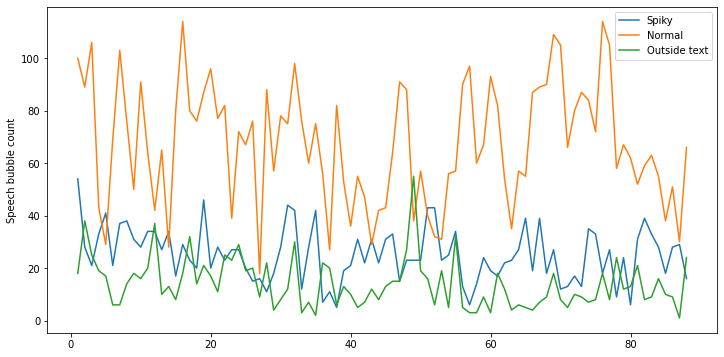

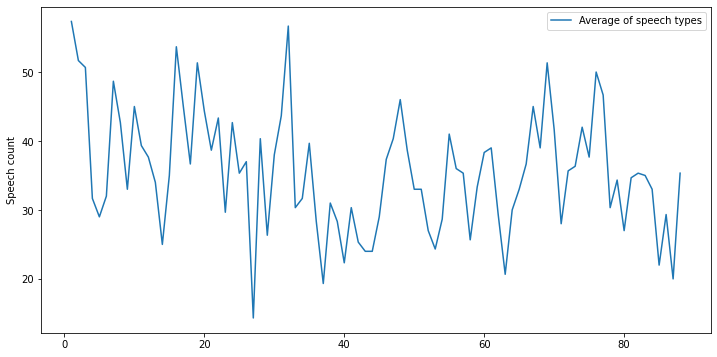

In [10]:
# Plotting speech bubble information
number_of_chapters = len(spiky_bubbles_in_naruto)
figure(figsize=(12, 6))
plt.plot(range(1,number_of_chapters+1), spiky_bubbles_in_naruto, label = "Spiky")
plt.plot(range(1,number_of_chapters+1), normal_bubbles_in_naruto, label = "Normal")
plt.plot(range(1,number_of_chapters+1), outside_text_in_naruto, label = "Outside text")
plt.ylabel('Speech bubble count')
plt.legend()
plt.show()

figure(figsize=(12, 6))
n_s_n_o_array = []         #n_s_n_o means naruto_spiky_normal_outside_text
for i in range(number_of_chapters):
    n_s_n_o_array.append((spiky_bubbles_in_naruto[i] + normal_bubbles_in_naruto[i] + outside_text_in_naruto[i])/3)
    
plt.plot(range(1,number_of_chapters+1), n_s_n_o_array, label = "Average of speech types")
plt.ylabel('Speech count')
plt.legend()
plt.show()

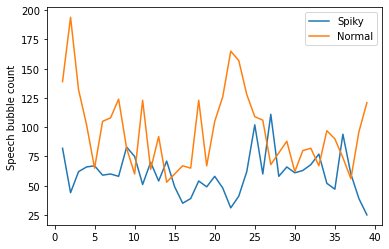

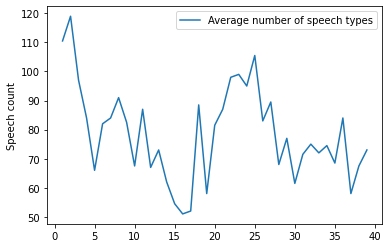

In [11]:
# Plotting speech bubble information
number_of_chapters = len(spiky_bubbles_in_one_piece)
plt.plot(range(1,number_of_chapters+1), spiky_bubbles_in_one_piece, label = "Spiky")
plt.plot(range(1,number_of_chapters+1), normal_bubbles_in_one_piece, label = "Normal")
plt.title("")
plt.ylabel('Speech bubble count')
plt.legend()
plt.show()

s_n_array = []         #s_n_o means spiky_normal_text
for i in range(number_of_chapters):
    s_n_array.append((spiky_bubbles_in_one_piece[i] + normal_bubbles_in_one_piece[i])/2)
    
plt.plot(range(1,number_of_chapters+1), s_n_array, label = "Average number of speech types")
plt.ylabel('Speech count')
plt.legend()
plt.show()

In [12]:
# Setting up variables for naruto arcs
intro_arc = naruto_df.loc[2:7]
hidden_rain_arc = naruto_df.loc[8:32]
konoha_attack_arc = naruto_df.loc[33:56]
tsunade_rescue_arc = naruto_df.loc[56:]

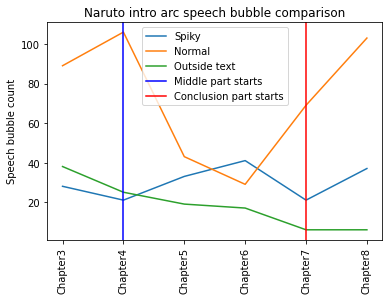

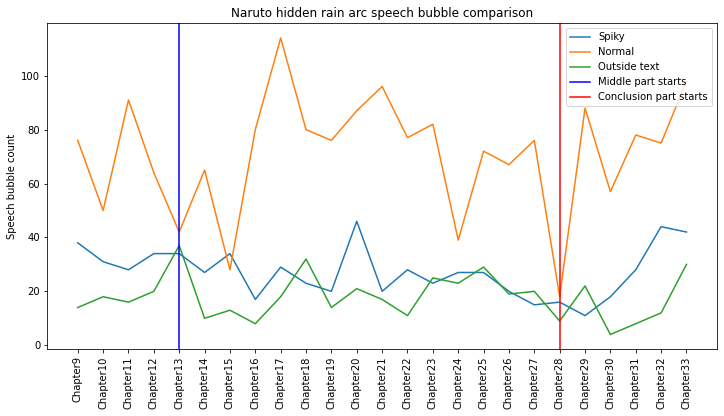

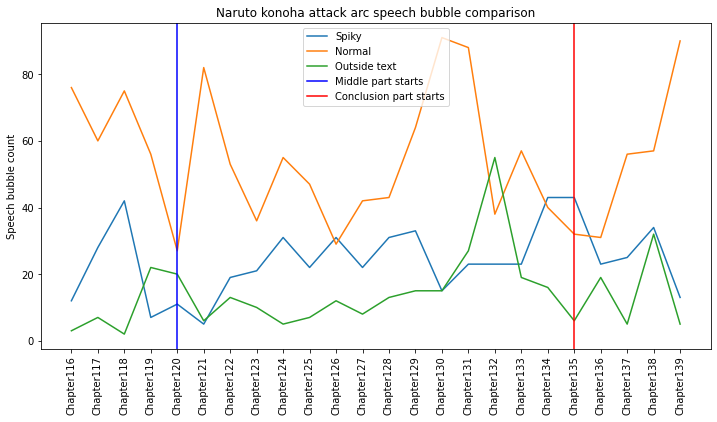

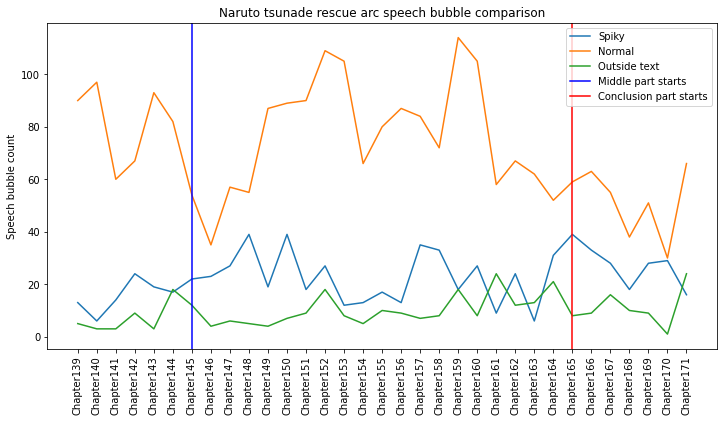

In [13]:
# Plotting naruto arcs
colors = ["b", "r"]
labels = ["Middle part starts", "Conclusion part starts"]
    
# Plotting intro arc
x = len(intro_arc)
plt.plot(range(1, x+1), intro_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, x+1), intro_arc["Normal"].to_numpy(), label = "Normal")
plt.plot(range(1, x+1), intro_arc["Outside_text"].to_numpy(), label = "Outside text")
plt.title("Naruto intro arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(x*0.2), math.ceil(x*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, x+1), intro_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

# Plotting hidden rain arc
figure(figsize=(12,6))
x = len(hidden_rain_arc)
plt.plot(range(1, x+1), hidden_rain_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, x+1), hidden_rain_arc["Normal"].to_numpy(), label = "Normal")
plt.plot(range(1, x+1), hidden_rain_arc["Outside_text"].to_numpy(), label = "Outside text")
plt.title("Naruto hidden rain arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(x*0.2), math.ceil(x*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, x+1), hidden_rain_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

# Plotting konoha attack arc
figure(figsize=(12,6))
x = len(konoha_attack_arc)
plt.plot(range(1, x+1), konoha_attack_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, x+1), konoha_attack_arc["Normal"].to_numpy(), label = "Normal")
plt.plot(range(1, x+1), konoha_attack_arc["Outside_text"].to_numpy(), label = "Outside text")
plt.title("Naruto konoha attack arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(x*0.2), math.ceil(x*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, x+1), konoha_attack_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

# Plotting tsunad rescue arc
figure(figsize=(12,6))
x = len(tsunade_rescue_arc)
plt.plot(range(1, x+1), tsunade_rescue_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, x+1), tsunade_rescue_arc["Normal"].to_numpy(), label = "Normal")
plt.plot(range(1, x+1), tsunade_rescue_arc["Outside_text"].to_numpy(), label = "Outside text")
plt.title("Naruto tsunade rescue arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(x*0.2), math.ceil(x*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, x+1), tsunade_rescue_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

In [14]:
# Setting up variables for one piece arcs
romance_dawn_arc = one_piece_df.loc[1:6]
orange_town_arc = one_piece_df.loc[7:20]
syrup_village_arc = one_piece_df.loc[21:]

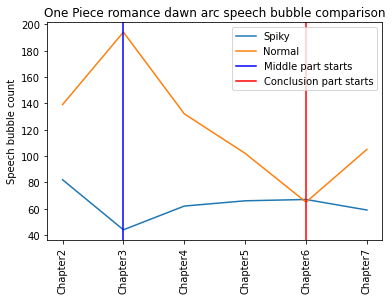

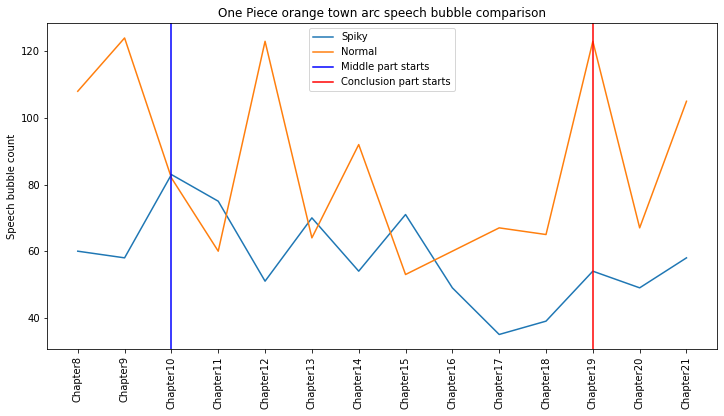

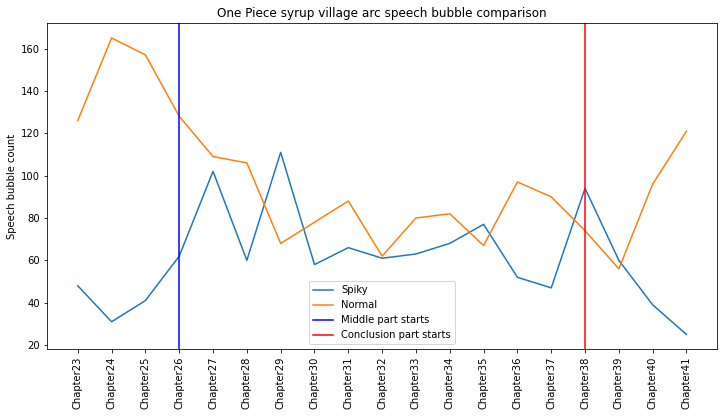

In [15]:
# Plotting one piece arcs
colors = ["b", "r"]
labels = ["Middle part starts", "Conclusion part starts"]

# Plotting romance dawn arc
number_of_chapters_romance_dawn = len(romance_dawn_arc)
plt.plot(range(1, number_of_chapters_romance_dawn + 1), romance_dawn_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, number_of_chapters_romance_dawn + 1), romance_dawn_arc["Normal"].to_numpy(), label = "Normal")
plt.title("One Piece romance dawn arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(number_of_chapters_romance_dawn*0.2), math.ceil(number_of_chapters_romance_dawn*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, number_of_chapters_romance_dawn + 1), romance_dawn_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

# Plotting orange town arc
figure(figsize=(12,6))
number_of_chapters_orange_town = len(orange_town_arc)
plt.plot(range(1, number_of_chapters_orange_town + 1), orange_town_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, number_of_chapters_orange_town + 1), orange_town_arc["Normal"].to_numpy(), label = "Normal")
plt.title("One Piece orange town arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(number_of_chapters_orange_town*0.2), math.ceil(number_of_chapters_orange_town*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, number_of_chapters_orange_town+1), orange_town_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

# Plotting syrup village arc
figure(figsize=(12,6))
number_of_chapters_syrup_village = len(syrup_village_arc)
plt.plot(range(1, number_of_chapters_syrup_village + 1), syrup_village_arc["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, number_of_chapters_syrup_village + 1), syrup_village_arc["Normal"].to_numpy(), label = "Normal")
plt.title("One Piece syrup village arc speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(number_of_chapters_syrup_village*0.2), math.ceil(number_of_chapters_syrup_village*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, number_of_chapters_syrup_village + 1), syrup_village_arc["Chapter_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

In [31]:
# Calculating RQ1 in raw numbers for Naruto
intro_arc_beg = intro_arc[:math.ceil(len(intro_arc)*0.2)-1]
intro_arc_mid = intro_arc[math.ceil(len(intro_arc)*0.2)-1:math.ceil(len(intro_arc)*0.8)]
intro_arc_con = intro_arc[math.ceil(len(intro_arc)*0.8):]

hidden_rain_arc_beg = hidden_rain_arc[:math.ceil(len(hidden_rain_arc)*0.2)-1]
hidden_rain_arc_mid = hidden_rain_arc[math.ceil(len(hidden_rain_arc)*0.2)-1:math.ceil(len(hidden_rain_arc)*0.8)]
hidden_rain_arc_con = hidden_rain_arc[math.ceil(len(hidden_rain_arc)*0.8):]

konoha_attack_arc_beg = konoha_attack_arc[:math.ceil(len(konoha_attack_arc)*0.2)-1]
konoha_attack_arc_mid = konoha_attack_arc[math.ceil(len(konoha_attack_arc)*0.2)-1:math.ceil(len(konoha_attack_arc)*0.8)]
konoha_attack_arc_con = konoha_attack_arc[math.ceil(len(konoha_attack_arc)*0.8):]

tsunade_rescue_arc_beg = tsunade_rescue_arc[:math.ceil(len(tsunade_rescue_arc)*0.2)-1]
tsunade_rescue_arc_mid = tsunade_rescue_arc[math.ceil(len(tsunade_rescue_arc)*0.2)-1:math.ceil(len(tsunade_rescue_arc)*0.8)]
tsunade_rescue_arc_con = tsunade_rescue_arc[math.ceil(len(tsunade_rescue_arc)*0.8):]

naruto_arc_beg_spiky_average = (sum(intro_arc_beg["Spiky"].to_numpy()) + sum(hidden_rain_arc_beg["Spiky"].to_numpy()) +
                         sum(konoha_attack_arc_beg["Spiky"].to_numpy()) + sum(tsunade_rescue_arc_beg["Spiky"].to_numpy()))/4
naruto_arc_beg_normal_average = (sum(intro_arc_beg["Normal"].to_numpy()) + sum(hidden_rain_arc_beg["Normal"].to_numpy()) +
                         sum(konoha_attack_arc_beg["Normal"].to_numpy()) + sum(tsunade_rescue_arc_beg["Normal"].to_numpy()))/4

naruto_arc_mid_spiky_average = (sum(intro_arc_mid["Spiky"].to_numpy()) + sum(hidden_rain_arc_mid["Spiky"].to_numpy()) +
                         sum(konoha_attack_arc_mid["Spiky"].to_numpy()) + sum(tsunade_rescue_arc_mid["Spiky"].to_numpy()))/4
naruto_arc_mid_normal_average = (sum(intro_arc_mid["Normal"].to_numpy()) + sum(hidden_rain_arc_mid["Normal"].to_numpy()) +
                         sum(konoha_attack_arc_mid["Normal"].to_numpy()) + sum(tsunade_rescue_arc_mid["Normal"].to_numpy()))/4

naruto_arc_con_spiky_average = (sum(intro_arc_con["Spiky"].to_numpy()) + sum(hidden_rain_arc_con["Spiky"].to_numpy()) +
                         sum(konoha_attack_arc_con["Spiky"].to_numpy()) + sum(tsunade_rescue_arc_con["Spiky"].to_numpy()))/4
naruto_arc_con_normal_average = (sum(intro_arc_con["Normal"].to_numpy()) + sum(hidden_rain_arc_con["Normal"].to_numpy()) +
                         sum(konoha_attack_arc_con["Normal"].to_numpy()) + sum(tsunade_rescue_arc_con["Normal"].to_numpy()))/4

naruto_arc_beg_chapter_count = len(intro_arc_beg) + len(hidden_rain_arc_beg) + len(konoha_attack_arc_beg) + len(tsunade_rescue_arc_beg)
naruto_arc_mid_chapter_count = len(intro_arc_mid) + len(hidden_rain_arc_mid) + len(konoha_attack_arc_mid) + len(tsunade_rescue_arc_mid)
naruto_arc_con_chapter_count = len(intro_arc_con) + len(hidden_rain_arc_con) + len(konoha_attack_arc_con) + len(tsunade_rescue_arc_con)

naruto_arc_averages_df = pd.DataFrame(data ={
        'Naruto speech bubble averages':  ['Spiky bubbles per chapter', 'Normal bubbles per chapter'],
        'Beginning arc': ["{:.2f}".format(naruto_arc_beg_spiky_average/naruto_arc_beg_chapter_count), 
                          "{:.2f}".format(naruto_arc_beg_normal_average/naruto_arc_beg_chapter_count)],
        'Middle arc': ["{:.2f}".format(naruto_arc_mid_spiky_average/naruto_arc_mid_chapter_count), 
                       "{:.2f}".format(naruto_arc_mid_normal_average/naruto_arc_mid_chapter_count)],
        'Conclussion arc': ["{:.2f}".format(naruto_arc_con_spiky_average/naruto_arc_con_chapter_count), 
                            "{:.2f}".format(naruto_arc_con_normal_average/naruto_arc_con_chapter_count)]
})

naruto_arc_averages_df

,Naruto speech bubble averages,Beginning arc,Middle arc,Conclussion arc
0,Spiky bubbles per chapter,5.68,6.18,6.67
1,Normal bubbles per chapter,18.77,16.48,16.19


In [32]:
# Calculating RQ1 in raw numbers for One Piece
romance_dawn_arc_beg = romance_dawn_arc[:math.ceil(len(romance_dawn_arc)*0.2)-1]
romance_dawn_arc_mid = romance_dawn_arc[math.ceil(len(romance_dawn_arc)*0.2)-1:math.ceil(len(romance_dawn_arc)*0.8)]
romance_dawn_arc_con = romance_dawn_arc[math.ceil(len(romance_dawn_arc)*0.8):]

orange_town_arc_beg = orange_town_arc[:math.ceil(len(orange_town_arc)*0.2)-1]
orange_town_arc_mid = orange_town_arc[math.ceil(len(orange_town_arc)*0.2)-1:math.ceil(len(orange_town_arc)*0.8)]
orange_town_arc_con = orange_town_arc[math.ceil(len(orange_town_arc)*0.8):]

syrup_village_arc_beg = syrup_village_arc[:math.ceil(len(syrup_village_arc)*0.2)-1]
syrup_village_arc_mid = syrup_village_arc[math.ceil(len(syrup_village_arc)*0.2)-1:math.ceil(len(syrup_village_arc)*0.8)]
syrup_village_arc_con = syrup_village_arc[math.ceil(len(syrup_village_arc)*0.8):]

one_piece_arc_beg_spiky_average = (sum(romance_dawn_arc_beg["Spiky"].to_numpy()) + sum(orange_town_arc_beg["Spiky"].to_numpy()) +
                         sum(syrup_village_arc_beg["Spiky"].to_numpy()))/3
one_piece_arc_beg_normal_average = (sum(romance_dawn_arc_beg["Normal"].to_numpy()) + sum(orange_town_arc_beg["Normal"].to_numpy()) +
                         sum(syrup_village_arc_beg["Normal"].to_numpy()))/3

one_piece_arc_mid_spiky_average = (sum(romance_dawn_arc_mid["Spiky"].to_numpy()) + sum(orange_town_arc_mid["Spiky"].to_numpy()) +
                         sum(syrup_village_arc_mid["Spiky"].to_numpy()))/3
one_piece_arc_mid_normal_average = (sum(romance_dawn_arc_mid["Normal"].to_numpy()) + sum(orange_town_arc_mid["Normal"].to_numpy()) +
                         sum(syrup_village_arc_mid["Normal"].to_numpy()))/3

one_piece_arc_con_spiky_average = (sum(romance_dawn_arc_con["Spiky"].to_numpy()) + sum(orange_town_arc_con["Spiky"].to_numpy()) +
                         sum(syrup_village_arc_con["Spiky"].to_numpy()))/3
one_piece_arc_con_normal_average = (sum(romance_dawn_arc_con["Normal"].to_numpy()) + sum(orange_town_arc_con["Normal"].to_numpy()) +
                         sum(syrup_village_arc_con["Normal"].to_numpy()))/3

one_piece_arc_beg_chapter_count = len(romance_dawn_arc_beg) + len(orange_town_arc_beg) + len(syrup_village_arc_beg)
one_piece_arc_mid_chapter_count = len(romance_dawn_arc_mid) + len(orange_town_arc_mid) + len(syrup_village_arc_mid)
one_piece_arc_con_chapter_count = len(romance_dawn_arc_con) + len(orange_town_arc_con) + len(syrup_village_arc_con)

one_piece_arc_averages_df = pd.DataFrame(data ={
        'One Piece speech bubble averages': ['Spiky bubbles per chapter', 'Normal bubbles per chapter'],
        'Beginning arc': ["{:.2f}".format(one_piece_arc_beg_spiky_average/one_piece_arc_beg_chapter_count), 
                          "{:.2f}".format(one_piece_arc_beg_normal_average/one_piece_arc_beg_chapter_count)],
        'Middle arc': ["{:.2f}".format(one_piece_arc_mid_spiky_average/one_piece_arc_mid_chapter_count), 
                       "{:.2f}".format(one_piece_arc_mid_normal_average/one_piece_arc_mid_chapter_count)],
        'Conclussion arc': ["{:.2f}".format(one_piece_arc_con_spiky_average/one_piece_arc_con_chapter_count), 
                            "{:.2f}".format(one_piece_arc_con_normal_average/one_piece_arc_con_chapter_count)]
})

one_piece_arc_averages_df

,One Piece speech bubble averages,Beginning arc,Middle arc,Conclussion arc
0,Spiky bubbles per chapter,17.78,21.49,16.11
1,Normal bubbles per chapter,45.50,29.77,30.56


In [69]:
# Fight chapter comparison
naruto_fight_chapter_spiky_bubble_count, naruto_fight_chapter_normal_bubble_count = 0,0
naruto_non_fight_chapter_spiky_bubble_count, naruto_non_fight_chapter_normal_bubble_count = 0,0
one_piece_fight_chapter_spiky_bubble_count, one_piece_fight_chapter_normal_bubble_count = 0,0
one_piece_non_fight_chapter_spiky_bubble_count, one_piece_non_fight_chapter_normal_bubble_count = 0,0

for i in range(len(naruto_df)):
    if(fight_chapters_in_naruto[i] == 1):
        naruto_fight_chapter_spiky_bubble_count += spiky_bubbles_in_naruto[i]
        naruto_fight_chapter_normal_bubble_count += normal_bubbles_in_naruto[i]
    else:
        naruto_non_fight_chapter_spiky_bubble_count += spiky_bubbles_in_naruto[i]
        naruto_non_fight_chapter_normal_bubble_count += normal_bubbles_in_naruto[i]
        
for i in range(len(one_piece_df)):
    if(fight_chapters_in_one_piece[i] == 1):
        one_piece_fight_chapter_spiky_bubble_count += spiky_bubbles_in_one_piece[i]
        one_piece_fight_chapter_normal_bubble_count += normal_bubbles_in_one_piece[i]
    else:
        one_piece_non_fight_chapter_spiky_bubble_count += spiky_bubbles_in_one_piece[i]
        one_piece_non_fight_chapter_normal_bubble_count += normal_bubbles_in_one_piece[i]

print("Naruto chapters not focusing on fight scenes have " + 
      "{:.2f}".format((naruto_non_fight_chapter_spiky_bubble_count/(naruto_non_fight_chapter_spiky_bubble_count + 
                      naruto_non_fight_chapter_normal_bubble_count))*100) + "% spiky bubbles and " +
      "{:.2f}".format((naruto_non_fight_chapter_normal_bubble_count/(naruto_non_fight_chapter_spiky_bubble_count + 
                      naruto_non_fight_chapter_normal_bubble_count))*100) + "% normal bubbles")

print("Naruto chapters focusing on fight scenes have " + 
      "{:.2f}".format((naruto_fight_chapter_spiky_bubble_count/(naruto_fight_chapter_spiky_bubble_count + 
                      naruto_fight_chapter_normal_bubble_count))*100) + "% spiky bubbles and " +
      "{:.2f}".format((naruto_fight_chapter_normal_bubble_count/(naruto_fight_chapter_spiky_bubble_count + 
                      naruto_fight_chapter_normal_bubble_count))*100) + "% normal bubbles")

print(" ")

print("One piece chapters not focusing on fight scenes have " + 
      "{:.2f}".format((one_piece_non_fight_chapter_spiky_bubble_count/(one_piece_non_fight_chapter_spiky_bubble_count + 
                      one_piece_non_fight_chapter_normal_bubble_count))*100) + "% spiky bubbles and " +
      "{:.2f}".format((one_piece_non_fight_chapter_normal_bubble_count/(one_piece_non_fight_chapter_spiky_bubble_count + 
                      one_piece_non_fight_chapter_normal_bubble_count))*100) + "% normal bubbles")

print("One piece chapters focusing on fight scenes have " + 
      "{:.2f}".format((one_piece_fight_chapter_spiky_bubble_count/(one_piece_fight_chapter_spiky_bubble_count + 
                      one_piece_fight_chapter_normal_bubble_count))*100) + "% spiky bubbles and " +
      "{:.2f}".format((one_piece_fight_chapter_normal_bubble_count/(one_piece_fight_chapter_spiky_bubble_count + 
                      one_piece_fight_chapter_normal_bubble_count))*100) + "% normal bubbles")

Naruto chapters not focusing on fight scenes have 22.26% spiky bubbles and 77.74% normal bubbles
Naruto chapters focusing on fight scenes have 35.09% spiky bubbles and 64.91% normal bubbles
 
One piece chapters not focusing on fight scenes have 31.47% spiky bubbles and 68.53% normal bubbles
One piece chapters focusing on fight scenes have 47.90% spiky bubbles and 52.10% normal bubbles


In [5]:
# Importing naruto data
naruto_first_chapter_df = pd.read_csv('data/naruto_first_chapter.csv', sep=";")
naruto_first_chapter_df.head()

,Page_number,Spiky,Normal,Box,Outside_text,Shadow
0,Page1,0,0,0,4,0
1,Page2,1,0,0,0,0
2,Page3,7,2,0,0,0
3,Page4,3,5,0,0,0
4,Page5,5,2,0,0,0


In [6]:
# Importing one piece first chapter data
one_piece_first_chapter_df = pd.read_csv('data/onepiece_first_chapter.csv', sep=";")
one_piece_first_chapter_df.head()

,Page_number,Spiky,Normal,Box,Outside_text,Shadow
0,Page1,0,3,4,0,0
1,Page2,0,2,5,0,0
2,Page3,8,2,1,0,0
3,Page4,5,6,0,0,0
4,Page5,0,4,1,0,0


In [7]:
# Printing first chapter data
sum_of_all_naruto_fc_text_types = (sum(naruto_first_chapter_df["Spiky"].to_numpy()) + 
                                   sum(naruto_first_chapter_df["Normal"].to_numpy()) + 
                                   sum(naruto_first_chapter_df["Box"].to_numpy()) + 
                                   sum(naruto_first_chapter_df["Outside_text"].to_numpy()) + 
                                   sum(naruto_first_chapter_df["Shadow"].to_numpy()))
sum_of_all_one_piece_fc_text_types = (sum(one_piece_first_chapter_df["Spiky"].to_numpy()) + 
                                      sum(one_piece_first_chapter_df["Normal"].to_numpy()) + 
                                      sum(one_piece_first_chapter_df["Box"].to_numpy()) + 
                                      sum(one_piece_first_chapter_df["Outside_text"].to_numpy()) + 
                                      sum(one_piece_first_chapter_df["Shadow"].to_numpy()))

print("Percentage of each text type in the first chapter of naruto:")
print("Spiky: " + "{:.2f}".format(sum(naruto_first_chapter_df["Spiky"].to_numpy())/sum_of_all_naruto_fc_text_types*100) + "%")
print("Normal: " + "{:.2f}".format(sum(naruto_first_chapter_df["Normal"].to_numpy())/sum_of_all_naruto_fc_text_types*100) + "%")
print("Box: " + "{:.2f}".format(sum(naruto_first_chapter_df["Box"].to_numpy())/sum_of_all_naruto_fc_text_types*100) + "%")
print("Outside text: " + "{:.2f}".format(sum(naruto_first_chapter_df["Outside_text"].to_numpy())/sum_of_all_naruto_fc_text_types*100) + "%")
print("Shadow: " + "{:.2f}".format(sum(naruto_first_chapter_df["Shadow"].to_numpy())/sum_of_all_naruto_fc_text_types*100) + "%")
print(" ")
print("Percentage of each text type in the first chapter of one piece:")
print("Spiky: " + "{:.2f}".format(sum(one_piece_first_chapter_df["Spiky"].to_numpy())/sum_of_all_one_piece_fc_text_types*100) + "%")
print("Normal: " + "{:.2f}".format(sum(one_piece_first_chapter_df["Normal"].to_numpy())/sum_of_all_one_piece_fc_text_types*100) + "%")
print("Box: " + "{:.2f}".format(sum(one_piece_first_chapter_df["Box"].to_numpy())/sum_of_all_one_piece_fc_text_types*100) + "%")
print("Outside text: " + "{:.2f}".format(sum(one_piece_first_chapter_df["Outside_text"].to_numpy())/sum_of_all_one_piece_fc_text_types*100) + "%")
print("Shadow: " + "{:.2f}".format(sum(one_piece_first_chapter_df["Shadow"].to_numpy())/sum_of_all_one_piece_fc_text_types*100) + "%")

Percentage of each text type in the first chapter of naruto:
Spiky: 29.76%
Normal: 53.27%
Box: 0.00%
Outside text: 12.80%
Shadow: 4.17%
 
Percentage of each text type in the first chapter of one piece:
Spiky: 30.04%
Normal: 63.68%
Box: 5.16%
Outside text: 0.45%
Shadow: 0.67%


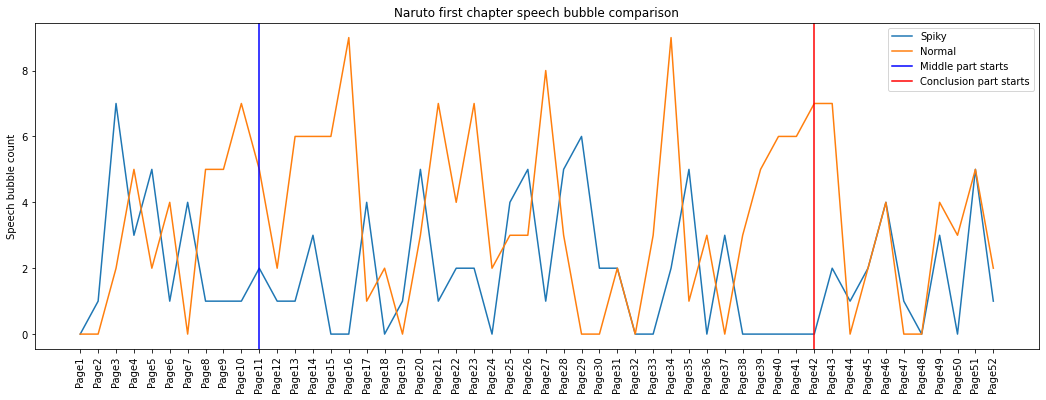

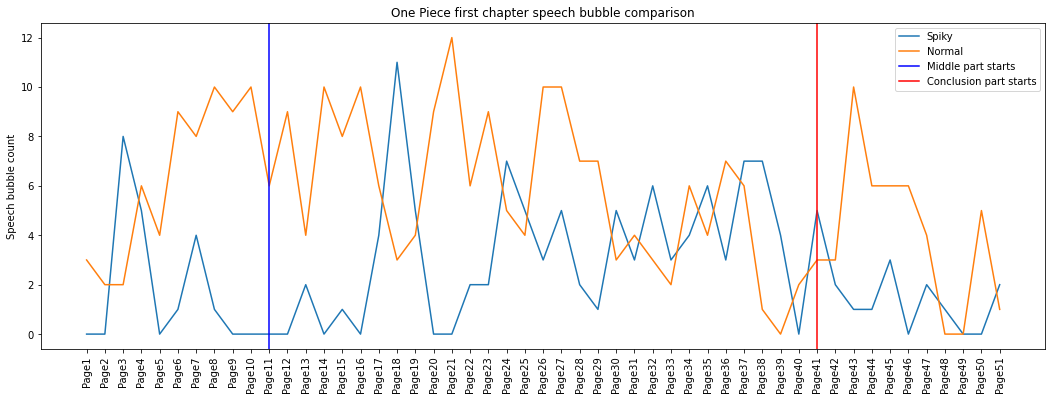

In [10]:
# Plotting the first chapter of naruto
colors = ["b", "r"]
labels = ["Middle part starts", "Conclusion part starts"]

figure(figsize=(18,6))
number_of_chapters_fc_naruto = len(naruto_first_chapter_df)
plt.plot(range(1, number_of_chapters_fc_naruto + 1), naruto_first_chapter_df["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, number_of_chapters_fc_naruto + 1), naruto_first_chapter_df["Normal"].to_numpy(), label = "Normal")
plt.title("Naruto first chapter speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(number_of_chapters_fc_naruto*0.2), math.ceil(number_of_chapters_fc_naruto*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, number_of_chapters_fc_naruto+1), naruto_first_chapter_df["Page_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()

# Plotting the first chapter of one piece
figure(figsize=(18,6))
number_of_chapters_fc_one_piece = len(one_piece_first_chapter_df)
plt.plot(range(1, number_of_chapters_fc_one_piece + 1), one_piece_first_chapter_df["Spiky"].to_numpy(), label = "Spiky")
plt.plot(range(1, number_of_chapters_fc_one_piece + 1), one_piece_first_chapter_df["Normal"].to_numpy(), label = "Normal")
plt.title("One Piece first chapter speech bubble comparison")
plt.ylabel('Speech bubble count')
for xc,c,l in zip([math.ceil(number_of_chapters_fc_one_piece*0.2), math.ceil(number_of_chapters_fc_one_piece*0.8)] ,colors ,labels):
    plt.axvline(xc, label=l, c=c)
plt.xticks(range(1, number_of_chapters_fc_one_piece+1), one_piece_first_chapter_df["Page_number"].to_list(), rotation='vertical')
plt.legend()
plt.show()